In [306]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as img
import math

data = pd.read_csv('shots_data.csv')
data.head()

,team,x,y,fgmade
0,Team A,-23.1,3.5,0
1,Team A,0.0,25.1,1
2,Team A,0.5,1.0,1
3,Team A,-5.6,5.2,0
4,Team A,4.0,14.5,1


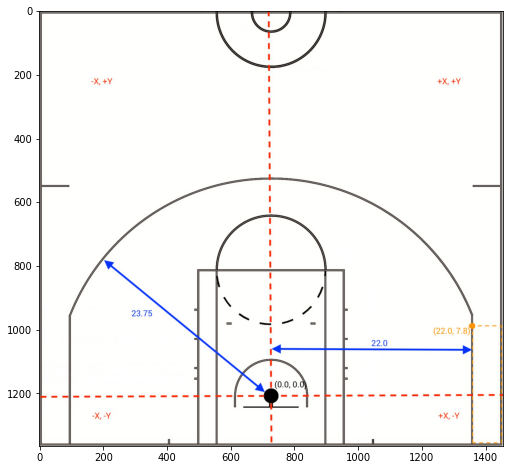

In [307]:
plt.figure(figsize=(13,8))
court = img.imread('court_diagram.jpg')
plt.imshow(court)

In [308]:
data.shape

(560, 4)

In [309]:
TotalShots = 560

In [310]:
#calculating hypotenuse for each and adding to DF
#Hypotenuse is what will help determine if a shot is NC3 or 2pt
hypotenuse = []
i = 0
while i < TotalShots:
    
    x = data.x[i]
    y = data.y[i]
    
    h = x*x + y*y
    h1 = math.sqrt(h)
    
    hypotenuse.append(h1)
    i+=1

data['hypotenuse'] = hypotenuse
data.head()

,team,x,y,fgmade,hypotenuse
0,Team A,-23.1,3.5,0,23.363647
1,Team A,0.0,25.1,1,25.100000
2,Team A,0.5,1.0,1,1.118034
3,Team A,-5.6,5.2,0,7.641989
4,Team A,4.0,14.5,1,15.041609


In [311]:
#For each shot, is it corner, NC3 or 2pt
#Adding these classifications to the DF
i = 0
shotType = []
while i < TotalShots:
    if((data.x[i] > 22) & (data.y[i] < 7.8)):
        shotType.append('corner')
        i+=1
        continue
    elif((data.x[i] < -22) & (data.y[i] < 7.8)):
        shotType.append('corner')
        i+=1
        continue
    
    elif(data.hypotenuse[i] > 23.75):
        shotType.append('NC3')
        i+=1
        continue
    elif(data.hypotenuse[i] <= 23.75):
        shotType.append('two')
        i+=1
        continue
    
    #shotType.append('NO_SHOT')
    
    #i+=1

data['shotType'] = shotType
data.head()

,team,x,y,fgmade,hypotenuse,shotType
0,Team A,-23.1,3.5,0,23.363647,corner
1,Team A,0.0,25.1,1,25.100000,NC3
2,Team A,0.5,1.0,1,1.118034,two
3,Team A,-5.6,5.2,0,7.641989,two
4,Team A,4.0,14.5,1,15.041609,two


In [288]:
#Grouping the shots by team and shotType to count how many total shots per shotType and team
total = (
    data.groupby(['team', 'shotType'])[['fgmade']]
    .count()
    .reset_index()
    .sort_values(by=['team'],ascending=False)
    .reset_index(drop=True)
    )
att = total.fgmade.values
total['fgAttempts'] = att

In [290]:
#Final shot chart

data1 = data[data['fgmade'] == 1]
final = (
    data1.groupby(['team', 'shotType'])[['fgmade']]
    .count()
    .reset_index()
    .sort_values(by=['team'],ascending=True)
    .reset_index(drop=True)
    )
final['fgAttempts'] = att
final

,team,shotType,fgmade,fgAttempts
0,Team A,NC3,29,96
1,Team A,corner,8,21
2,Team A,two,68,163
3,Team B,NC3,35,90
4,Team B,corner,5,20
5,Team B,two,75,170


In [303]:
print(data[data['team'] == 'Team A'].shape)
print(data[data['team'] == 'Team B'].shape)

(280, 4)
(280, 4)


In [304]:
#Both teams have the same number of shots
teamShots = 280
percent = final.fgAttempts / teamShots
final['percentOfShots'] = percent
final

,team,shotType,fgmade,fgAttempts,percentOfShots
0,Team A,NC3,29,96,0.342857
1,Team A,corner,8,21,0.075000
2,Team A,two,68,163,0.582143
3,Team B,NC3,35,90,0.321429
4,Team B,corner,5,20,0.071429
5,Team B,two,75,170,0.607143


In [295]:
#eFG = FGM + (.5 * 3PM)  /  FGA

print("The NC3 eFG for Team A is: ", 29 + (.5 * 29) / 96)
print("The corner eFG for Team A is: ", 8 + (.5 * 8) / 21)
print("The 2pt shot eFG for Team A is: ", 68 + (.5 * 0) / 163)
print("The NC3 eFG for Team B is: ", 35 + (.5 * 35) / 90)
print("The corner eFG for Team B is: ", 5 + (.5 * 5) / 20)
print("The 2pt shot eFG for Team B is: ", 75 + (.5 * 0) / 170)

The NC3 eFG for Team A is:  29.151041666666668
The corner eFG for Team A is:  8.19047619047619
The 2pt shot eFG for Team A is:  68.0
The NC3 eFG for Team B is:  35.19444444444444
The corner eFG for Team B is:  5.125
The 2pt shot eFG for Team B is:  75.0
